In [6]:
import numpy as np
import trimesh
import matplotlib.pyplot as plt

In [2]:
mesh = trimesh.load('./obj/model.stl')

In [4]:
# points = mesh.sample(30)

In [12]:
mesh.vertices

TrackedArray([[-2.5       , -1.        ,  0.25      ],
              [-2.5       ,  1.        , -0.25      ],
              [-2.5       , -1.        , -0.25      ],
              ...,
              [ 0.96679282, -0.01011871,  0.25      ],
              [ 0.9546876 ,  0.15450849,  0.25      ],
              [ 0.96679282,  0.01011871,  0.25      ]])

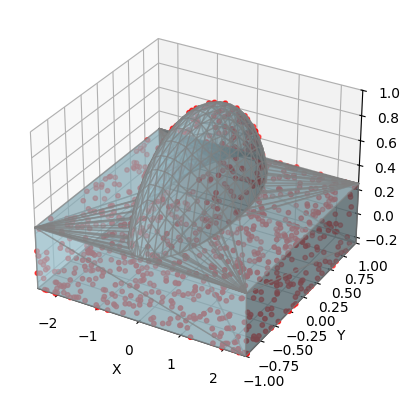

In [23]:
import trimesh

# 3D 메쉬 파일 로드 (예: 'mesh.obj')
mesh = trimesh.load('./obj/model.stl')

# 메쉬 표면에 점을 샘플링하여 포인트 클라우드 생성
num_points = 1000  # 샘플링할 점의 수
points = mesh.sample(num_points)

# 3D 모형과 샘플링한 점 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 메쉬의 표면을 와이어프레임으로 그리기
ax.plot_trisurf(mesh.vertices[:, 0], mesh.vertices[:, 1], mesh.vertices[:, 2], triangles=mesh.faces, color='lightblue', alpha=0.5, edgecolor='gray')

# 샘플링된 점들을 scatter plot으로 그리기
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='red', s=10)

# 축 범위 설정 (메쉬 크기에 따라 자동 조정)
ax.set_xlim(mesh.bounds[0][0], mesh.bounds[1][0])
ax.set_ylim(mesh.bounds[0][1], mesh.bounds[1][1])
ax.set_zlim(mesh.bounds[0][2], mesh.bounds[1][2])

# 축 레이블 설정
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


In [25]:
# !pip install scipy

   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.5/44.5 MB 3.4 MB/s eta 0:00:14
    --------------------------------------- 0.8/44.5 MB 2.8 MB/s eta 0:00:16
    --------------------------------------- 1.0/44.5 MB 1.7 MB/s eta 0:00:26
    --------------------------------------- 1.0/44.5 MB 1.7 MB/s eta 0:00:26
   - -------------------------------------- 1.3/44.5 MB 1.3 MB/s eta 0:00:35
   - -------------------------------------- 1.6/44.5 MB 1.2 MB/s eta 0:00:35
   - -------------------------------------- 1.6/44.5 MB 1.2 MB/s eta 0:00:35
   - -------------------------------------- 1.8/44.5 MB 1.1 MB/s eta 0:00:38
   - -------------------------------------- 2.1/44.5 MB 1.1 MB/s eta 0:00:40
   - -------------------------------------- 2.1/44.5 MB 1.1 MB/s eta 0:00:40
   -- ------------------------------------- 2.4/44.5 MB 1.0 MB/s eta 0:00:43
   -- ------------------------------------- 2.4/44.5 MB 1.0 MB/s eta 0:00:43
   -- 

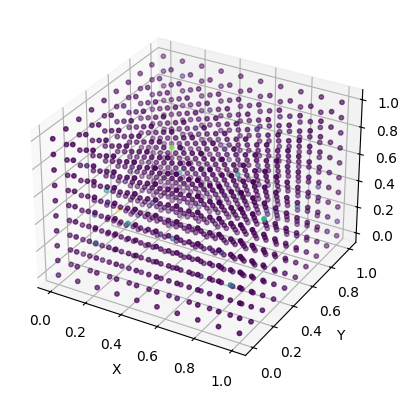

In [26]:
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

# 예를 들어 3D 포인트 샘플링한 데이터
# 실제로는 mesh.sample()을 사용한 데이터를 사용하면 됩니다.
np.random.seed(0)
points = np.random.rand(1000, 3)  # 1000개의 3D 포인트 샘플

# Parzen Window 함수 정의
def parzen_window_density_estimation(data, point, h):
    # data: 샘플링된 데이터 포인트들
    # point: 확률 밀도를 추정할 위치
    # h: 윈도우 폭 (밴드폭)
    
    n = data.shape[0]  # 샘플의 개수
    d = data.shape[1]  # 차원 수
    
    # 다변량 정규 분포 PDF를 사용한 Parzen Window
    kernel = multivariate_normal(mean=np.zeros(d), cov=h**2)
    
    # 각 포인트에 대해 커널의 합을 계산
    density = np.sum(kernel.pdf((point - data) / h)) / (n * h**d)
    
    return density

# 샘플링된 점에서 Parzen Window를 사용하여 확률 밀도 함수 계산
h = 0.1  # 밴드폭 (윈도우 폭)
grid_size = 10  # 그리드 해상도 (확률 밀도 함수를 계산할 그리드 크기)
x = np.linspace(0, 1, grid_size)
y = np.linspace(0, 1, grid_size)
z = np.linspace(0, 1, grid_size)
X, Y, Z = np.meshgrid(x, y, z)

density = np.zeros(X.shape)

# 그리드의 각 포인트에 대해 밀도 계산
for i in range(grid_size):
    for j in range(grid_size):
        for k in range(grid_size):
            point = np.array([X[i, j, k], Y[i, j, k], Z[i, j, k]])
            density[i, j, k] = parzen_window_density_estimation(points, point, h)

# 밀도를 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 등고선 형태로 밀도 시각화
ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), c=density.flatten(), cmap='viridis', s=10)

# 축 레이블 설정
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()
